# Fall 2023 IS 597 Final Project
## The Analysis of Tweets with #ChatGPT
Name: Ruixin Han
GitHub ID: hanlily666

### Background
When ChatGPT launched, the information about the new technology went viral on social media. On Twitter, users can easily have first-hand updates on what the big companies have discussed and their next move in the current competitive environment. This analysis investigates the tweets that had #ChatGPT at the time during January 2023 and October 2023, and specifically looks into the content of the tweets and the external links within the tweets.

I plan to use Twitter API and pull the most recent 1,500 tweet data (as I researched, Twitter limits the number of tweets for a free developer account per month) to further analyze the Twitter data that has the #ChatGPT based on the ChatGPT Tweets Analysis

### Hypotheses
- Tweets containing external links are more likely to direct users to authoritative sources such as official blogs, websites of major technology companies, or established news outlets, compared to tweets without external links. Tweets containing external links have more retweets and likes than tweets without external links.
    - is there a difference among diverse categories?
- In the dataset of tweets, those featuring specific ethics-related keywords and hashtags are observed at a lower frequency compared to those expressing enthusiasm. Furthermore, tweets with ethics-related content are anticipated to garner more likes and retweets, surpassing both the general average engagement for tweets lacking these markers and the engagement metrics of similar tweets from a prior timeframe.
    - collection of keywords: 
- Tweets with links to external content that cite diverse sources (published papers, authorized websites) are more likely to receive likes and retweets than those that do not cite sources.
    - By automating the external sites, look for and verify citation sources that are well-known and reliable. Then, compare the number of likes and retweets to other sites that do not have sources.
- (new) The external links in tweets are more frequently directed towards the application of OpenAI API instead of ChatGPT.
    - Need to take both the tweet content and the external links content into consideration and look for the usage of “openai api” and “chatgpt”


Datetime	Tweet Id	Text	Username	Permalink	User	Outlinks	CountLinks	ReplyCount	RetweetCount	LikeCount	QuoteCount	ConversationId	Language	Source	Media	QuotedTweet	MentionedUsers	hashtag	hastag_counts

### Hypothesis One
- Tweets containing external links are more likely to direct users to authoritative sources such as official blogs, websites of major technology companies, or established news outlets, compared to tweets without external links. Tweets containing external links have more retweets and likes than tweets without external links.
    - is there a difference among diverse categories?

In [2]:
import csv
import requests
import lxml.html
import lxml.etree as etree
import re
import pandas as pd
from time import sleep
import ast
from bs4 import BeautifulSoup
from googletrans import Translator
from urllib.parse import urlparse

#### Count the valid outlinks
Since the value of "Outlinks" is a string representation of the list, I need to convert it to an actual list. The code is referenced from here: https://www.geeksforgeeks.org/python-convert-a-string-representation-of-list-into-list/

In [3]:
def fetch_url_with_html_tree(url: str) -> lxml.etree:
    """

    :param url:
    :return:
    """
    tree = None
    request_count = 0
    while tree is None:
        try:
            r = requests.get(url)
            request_count += 1
            print(type(r.text))
            tree = lxml.html.fromstring(r.text)
        except (ConnectionError, ConnectionRefusedError) as e:
            print(f"Error retrieving {url}. Skipping this URL.")
            return None
    return tree

Plan for the next steps
- Find the technique to extract the text from the web page
- Find ways to analyze text

In [4]:
# referenced from https://stackoverflow.com/questions/9530950/parsing-hostname-and-port-from-string-or-url 
def extract_hostname(url: str) -> str:
    parsed_url = urlparse(url)
    return parsed_url.hostname

In [5]:
import pandas as pd
from urllib.parse import urlparse
import ast

def extract_hostname(url: str) -> str:
    parsed_url = urlparse(url)
    hostname = parsed_url.hostname
    # Split the hostname by '.'
    parts = hostname.split('.')
    # If there is only one dot, extract the first part
    if len(parts) == 2:
        hostname = parts[0]
    # If there are more than two dots and the first part is not 'www', use the first part
    elif len(parts) > 2 and parts[0] != 'www':
        hostname = parts[0]
    # If there are two dots, extract the second part
    elif len(parts) == 3:
        hostname = parts[1]
    return hostname

# Read the CSV file into a DataFrame
df = pd.read_csv('chatgpt1.csv')

# Drop rows where 'Outlinks' is NaN
df = df.dropna(subset=['Outlinks'])

# Convert 'Outlinks' from string representation of list to actual list
df['Outlinks'] = df['Outlinks'].apply(ast.literal_eval)

# Extract hostnames from each URL in 'Outlinks' and add them to a set
all_hostnames = set()
for outlinks in df['Outlinks']:
    for url in outlinks:
        all_hostnames.add(extract_hostname(url))

print(all_hostnames)

{'idrak34', 'btob-leaders', 'updates4devs', 'appsflyer', 'ninjamarketing', 'cio', 'newssairan', 'k-tai', 'shorturl', 'booknotion', 'verfassungsblog', 'arynews', 'analyticsblog', 'builtpc', 'explainablestartup', 'blogsbychatgpt', 'synthedia', 'newsatw', 'ca', 'octela', 'dasachin', 'beta', 'windtux', 'punjabi', 'suzannefergus', 'criticalai', 'fanavarihooshmand', 'saveflix', 'news24', 'digitalkibris', 'elcandelerotecnologico', 'www.amazon.com.br', 'evol', 'pcnpost', 'leonfurze', 'www.diariodequeretaro.com.mx', 'businessnewsreports', 'elbayan', 'www.bloomberglinea.com.br', 'becomingtheexpert', 'metaphor', 'usmoneyjacks', 'solidnews', 'dailyvisitors', 'merterkal', 'enbursa', 'zentralplus', 'inosoft', 'morrislee1234', 'ebay', 'tchfsh', 'cho-news', 'leafmagazine', 'lapdrop', 'swfinstitute', 'invst', 'thestandard', 'knack', 'kaorapit', 'www.tendencias.kpmg.es', 'nerdswire', 'unboxholics', 'chandrashaker', 'www.infoquest.co.th', 'internet', 'interestingengineering', 'biedexmarkets', 'ueberschri

https://stackoverflow.com/questions/11350770/filter-pandas-dataframe-by-substring-criteria

In [6]:
df_forbes = pd.read_csv('Forbes_2000_top_company_CLNQ11.csv')

# Convert the 'Organization Name' column to lowercase for comparison
df_forbes['Organization Name'] = df_forbes['Organization Name'].str.lower()

# Convert all_hostnames to a DataFrame for easier comparison
df_hostnames = pd.DataFrame(list(all_hostnames), columns=['hostname'])

In [7]:
# Add a new column 'hostname' to df_forbes that contains the hostname if the 'Organization Name' is in the 'hostname' Series of df_hostnames, otherwise N/A
df_forbes['hostname'] = df_forbes['Organization Name'].apply(lambda x: x if df_hostnames['hostname'].str.contains(x).any() else 'N/A')

matched_hostname = df_forbes[df_forbes['hostname'] != 'N/A']
matched_hostname

/var/folders/hd/1_05khmx18g4v9p82m039_9c0000gn/T/ipykernel_79549/1397964734.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_forbes['hostname'] = df_forbes['Organization Name'].apply(lambda x: x if df_hostnames['hostname'].str.contains(x).any() else 'N/A')


,2022 Ranking,Organization Name,Industry,Country,Year Founded,CEO,Revenue (Billions),Profits (Billions),Assets (Billions),Market Value (Billions),Total Employees,hostname
5,6,amazon,Retailing,United States,1994,Andy Jassy,469.82,33.36,420.55,1468.40,1608000.0,amazon
6,7,apple,Technology Hardware & Equipment,United States,1976,Tim Cook,378.70,100.56,381.19,2640.32,154000.0,apple
15,16,shell,Oil & Gas Operations,United Kingdom,1907,Bernardus van Beurden,261.76,20.27,404.38,211.10,82000.0,shell
28,29,total,Oil & Gas Operations,France,1924,Patrick Pouyanné,185.12,16.14,293.46,127.32,101309.0,total
49,50,bp,Oil & Gas Operations,United Kingdom,1909,Bernard Looney,158.01,7.55,287.27,98.38,65900.0,bp
...,...,...,...,...,...,...,...,...,...,...,...,...
1806,1807,nio,Consumer Durables,China,2014,Bin Li,5.60,-1.64,13.00,29.66,0,nio
1832,1833,wsp,Construction,Canada,1987,Alexandre J. L'Heureux,8.20,0.38,8.91,14.47,55000.0,wsp
1888,1889,sca,Household & Personal Products,Sweden,1929,Ulf Örjan Larsson,2.19,0.71,13.06,14.09,3373.0,sca
1937,1938,gap,Retailing,United States,1969,Bobby Martin,16.67,0.26,12.76,4.33,78570.0,gap


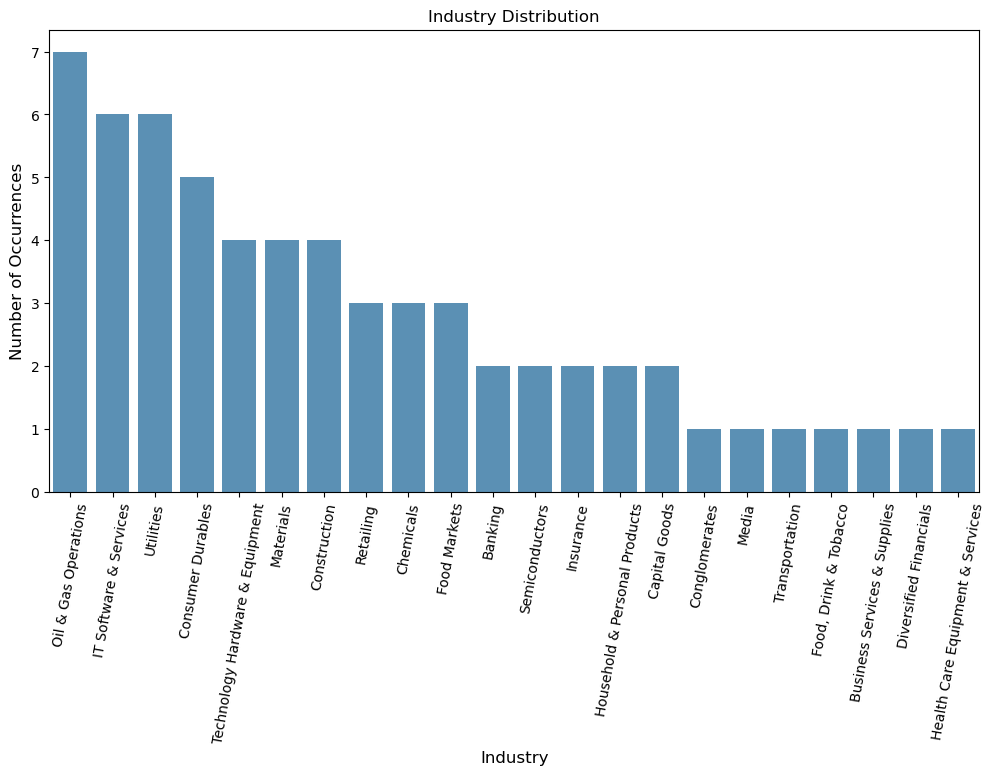

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the count of each unique value in the 'Industry' column
industry_counts = matched_hostname['Industry'].value_counts()

# Plot the counts as a bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x=industry_counts.index, y=industry_counts.values, alpha=0.8)
plt.title('Industry Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Industry', fontsize=12)
plt.xticks(rotation=80)  
plt.show()


For each row that has the match of "xx models", if not english, translate to en, if there is a company name or  then look for the name in the

In [ ]:
translator = Translator()
translated_content = translator.translate('初めてChatGPT使ってるけどすごいな・・・ 一応情報が正しいか自分も調べながらやってるけど、これでプログラミングの勉強ができそうだ', dest='en')
print(translated_content.text)

Hashtags and Keywords:

Look for specific hashtags or keywords associated with creativity (#innovation, #creativeidea, #creativity) or helpfulness (#lifesaving, #protip, #helpful).
Engagement Metrics:

High numbers of retweets, likes, and replies can sometimes indicate that the tweet's content is resonating with users, which could be due to creative content or helpful information.
Link Analysis:

Tweets that include links to known creative or helpful resources (such as DIY blogs, educational sites, or charity organizations) might indicate the nature of the tweet.